In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [109]:
# read data

In [110]:
df_train = pd.read_csv("train.csv") # 1460rows
df_test = pd.read_csv("test.csv")   # 1459rows

In [111]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [112]:
#test.csv doesn't contain SalePrice

In [113]:
# concat data

In [114]:
df = pd.concat([df_train, df_test])

In [115]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [116]:
df_train["SalePrice"].mean()

180921.19589041095

<AxesSubplot:>

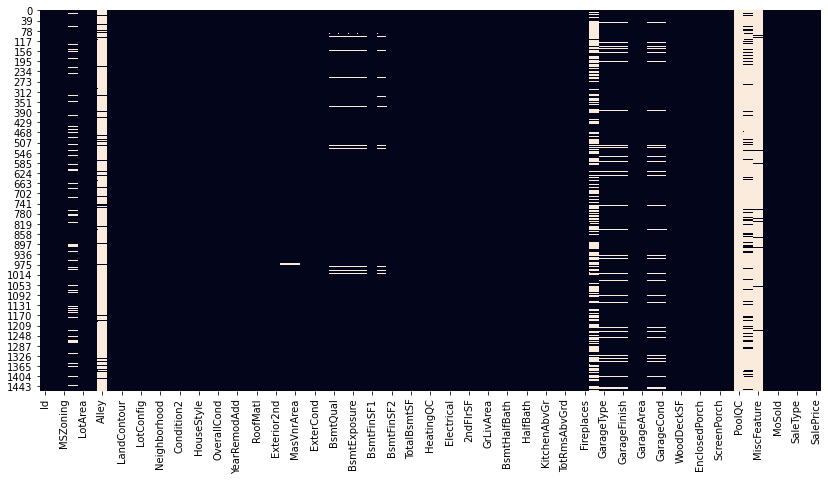

In [117]:
figure_size = (14, 7)  
fig, ax = plt.subplots(figsize=figure_size)
sns.heatmap(df_train.isnull(), cbar=False )

In [118]:
# drop colum which contain many NaN values

In [119]:
df = df.drop(["Id","Alley", "PoolQC", "Fence", "MiscFeature"], axis=1)

In [120]:
# fillna with mean value or 0 

In [121]:
for i in list(df.columns):
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        df[i] = df[i].fillna(df[i].mean())
    elif df[i].dtype == 'object':
        df[i] = df[i].fillna(df[i].mode()[0])

In [122]:
# labeling

In [123]:
le = LabelEncoder()
for m in list(df.columns):
    if df[m].dtype == "object":
        label = list(df[m].values)
        df[m] = le.fit_transform(label)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   int64  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int64  
 5   LotShape       2919 non-null   int64  
 6   LandContour    2919 non-null   int64  
 7   Utilities      2919 non-null   int64  
 8   LotConfig      2919 non-null   int64  
 9   LandSlope      2919 non-null   int64  
 10  Neighborhood   2919 non-null   int64  
 11  Condition1     2919 non-null   int64  
 12  Condition2     2919 non-null   int64  
 13  BldgType       2919 non-null   int64  
 14  HouseStyle     2919 non-null   int64  
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [125]:
# make scatterplot and check the value :only with train data

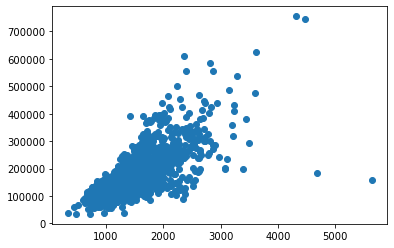

In [126]:
plt.scatter(df.GrLivArea[:1460], df.SalePrice[:1460])

In [127]:
df.drop([523,1298], axis=0, inplace=True)

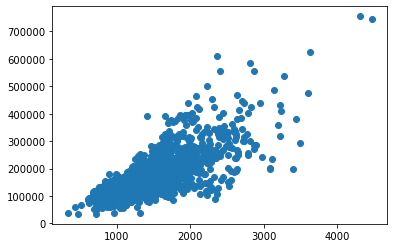

In [128]:
plt.scatter(df.GrLivArea[:1460], df.SalePrice[:1460])

In [129]:
# prepare data

In [130]:
y = df["SalePrice"][:1460]
df.drop(["SalePrice"], axis = 1, inplace = True)
x = df[:1460]

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [132]:
# modelibg and evaluating

In [134]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train ,y_train)
y_pred = xgboost_model.predict(x_test)
rmse = mean_squared_error(y_pred, y_test , squared=False)
print(rmse) 

C:\Users\pc\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:40:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
54066.63312700309


In [145]:
param = {'colsample_bytree':[0.1, 0.5],  
              'n_estimators':[500, 1000],
              'max_depth':[1, 5],
              'eta':[0.1, 0.5]
              }

In [146]:
gs = GridSearchCV(XGBRegressor(), param, refit = True, cv =8, verbose = 1)
grid_serch = gs.fit(x_train, y_train)

Fitting 8 folds for each of 16 candidates, totalling 128 fits


In [147]:
predict = grid_serch.predict(x_test)
rmse = mean_squared_error(y_test, predict,squared=False)
print(rmse)

24552.79437964856


In [141]:
param = {'colsample_bytree':[0.4],  
              'n_estimators':[800],
              'max_depth':[3],
              'eta':[0.1],
              'subsample':[0.5],
              "reg_alpha":[0.5], 
              "reg_lambda":[0.3]
              }

In [140]:
gs = GridSearchCV(XGBRegressor(), param, refit = True, cv =8, verbose = 1)
grid_serch = gs.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [142]:
predict = grid_serch.predict(x_test)
rmse = mean_squared_error(y_test, predict,squared=False)
print(rmse)

23443.854387468375
